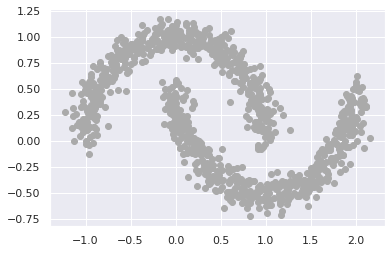

In [94]:
import numpy as np
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
from scipy import sparse

sns.set()

# X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
X, clusters = make_moons(n_samples=1000,noise=0.08)
plt.scatter(X[:,0], X[:,1], c='#aaa')

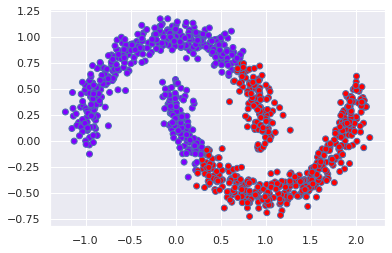

In [95]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow',edgecolors='b')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


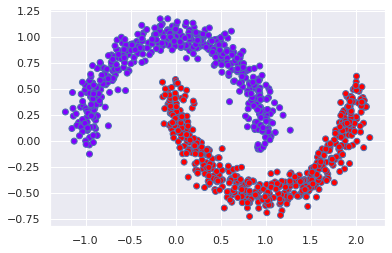

In [96]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', edgecolors='b')

Runtime test

In [97]:
%timeit km.fit(X)

16.9 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%timeit sc.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expecte

376 ms ± 52.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


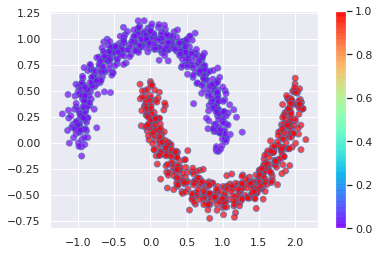

In [98]:
sigma = 0.1
n = X.shape[0]
I = np.zeros((n,n), dtype=int)+np.arange(n, dtype=int)
dist = np.sum((X[I,:] - X[I.T,:])**2,axis=2)
W = np.exp(-dist/(2*sigma**2))

#Graph Laplacian
n = W.shape[0]
d = W@np.ones(n)
L = sparse.spdiags(d,0,n,n) - W  

#Find Fiedler vector
vals, vec = sparse.linalg.eigsh(L,k=5,which='SM')
v = vec[:,1]

#Cluster labels
labels = v > 0

plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.colorbar()


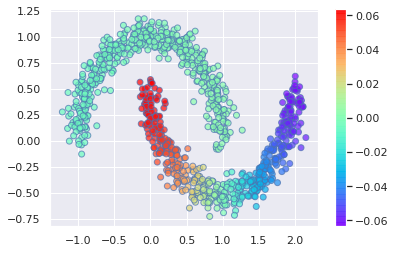

In [100]:
plt.scatter(X[:,0], X[:,1], c=vec[:,2], cmap='rainbow', alpha=0.7, edgecolors='b')
plt.colorbar()